In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

Clase general para implementar KNN

In [75]:
class KNN:
    def __init__(self):
        pass

    def loadData(self, X, y):
        self.X = X.reshape(len(X), X[0].size).astype(np.int16)
        self.m = X.shape[0]
        self.y = y
        self.idx = []

    def predict(self, X, k):
        self.size = X.shape[0]
        self.y_guess = np.zeros((self.size,))
        self.norm = np.zeros((self.m,))
        
        X = X.reshape(len(X), X[0].size).astype(np.int16)
        
        for i in range(self.size):
            for j in range(self.m):
                #norm es un array con la distancia de la foto i a cada ejemplo de train j
                self.norm[j] = linalg.norm(self.X[j,:] - X[i,:])

            #Voy a obtener los índices de las k distancias más cercanas 
            self.idx = np.argpartition(self.norm, k)[:k]
            self.y_guess[i] = int(np.mean(self.y[self.idx]))
        return self.y_guess

    def accuracy(self, ytrue):
        return float(np.sum(ytrue==self.y_guess))/float(len(ytrue))

    

## MNIST dataset
Importar y visualizar MNIST dataset

In [3]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 



X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


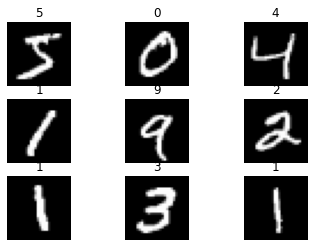

In [16]:
#Plot first 9 examples of the train set
for i in range(9):  
    ax = plt.subplot(3, 3, i+1)
    ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title(train_y[i])
    plt.axis('off')

plt.show()

Fiteando el modelo KNN a MNIST

In [18]:
model = KNN()

model.loadData(train_X, train_y)

y_pred = model.predict(test_X[0:100,:], 1)

Accuracy for the first 100 elements in the test set: 100% accuracy


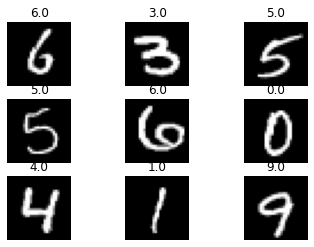

In [24]:
print("Accuracy for the first 100 elements in the test set: {:.0f}% accuracy".format(100*model.accuracy(test_y[0:100])))

for i in range(50, 59):
    ax = plt.subplot(3, 3, i-49)
    ax.imshow(test_X[i], cmap=plt.get_cmap('gray'))
    ax.set_title(y_pred[i])
    plt.axis('off')
plt.show()

## CIFAR10 dataset

In [25]:
from keras.datasets import cifar10

# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

170498071/170498071 [==============================] - 14s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [55]:
names_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 
              3: 'cat', 4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 8: 'ship', 
              9: 'truck'}

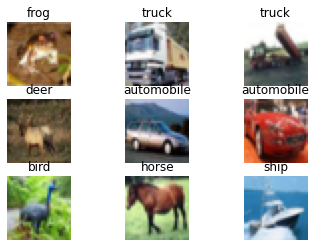

In [76]:
# plot first few images

#Plot first 9 examples of the train set
for i in range(9):  
    ax = plt.subplot(3, 3, i+1)
    ax.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    ax.set_title(names_dict[int(trainy[i,0])])
    plt.axis('off')

plt.show()

In [79]:
model2 = KNN()

model2.loadData(trainX, trainy[:,0])

y_pred2 = model2.predict(testX[0:100,:], 1)

In [99]:
#Timeo mi algoritmo
%timeit model2.predict(testX[0:1,:], 1)

1.31 s ± 92.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


0.31


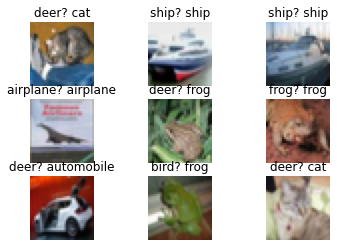

In [87]:
#print("Accuracy for the first 100 elements in the test set: {:.0f}% accuracy".format(100*model2.accuracy(testy[0:100])))
print(model2.accuracy(testy[0:100, 0]))
offset = 0
for i in range(offset, offset+9):
    ax = plt.subplot(3, 3, i-offset+1)
    ax.imshow(testX[i], cmap=plt.get_cmap('gray'))
    ax.set_title(names_dict[int(y_pred2[i])]+"? "+names_dict[int(testy[i])])
    plt.axis('off')
plt.show()

Quiero ver si el paquete de KNN de scikit learn es más rápido

En mi pc mi algoritmo tarda $\sim$ 1 segundo.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(trainX.reshape(len(trainX), trainX[0].size).astype(np.int16), trainy[:,0])

KNeighborsClassifier(n_neighbors=1)

In [97]:
# Probando si scikit learn predice lo mismo que yo
pred = neigh.predict(testX[0:10,:].reshape(10, testX[0:1].size))
pred == y_pred2[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [98]:
#Timeo el algoritmo... tarda un poquito más que el mío (solo para un ejemplo de cifar)
%timeit neigh.predict(testX[0:1,:].reshape(1, testX[0:1].size))

1.65 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
